###  Calculate Regression Statistics

In [207]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
import matplotlib.ticker as mtick
import scipy.stats as stats

In [208]:
combo8_df = pd.read_csv("Combined_Hosp_Drug_Util.csv")
#combo8_df.count()

In [209]:
# Define variables from dataframe to use in regression analysis

# Independent Variables
ADI_State = list(combo8_df['ADI State Rank'])
ADI_Natl = list(combo8_df['ADI Natl Rank'])
Pct_Male = list(combo8_df['Pct Male'])
Median_Income = list(combo8_df['Household Median Income'])
Pct_Insured = list(combo8_df['Pct Insured'])
Tapestry_Seg = list(combo8_df['Tapestry Seg Nr'])
Lifemode = list(combo8_df['Lifemode Code'])
Opioid_Rx_per_1000 = list(combo8_df['Opioid Rx per 1,000'])
Opioid_Pop_per_1000 = list(combo8_df['Pop w Opioid Rx per 1,000'])

# Dependent Variables
C2_C4_per_1000 = list(combo8_df['C2-C4 per 1,000'])
C4_per_1000 = list(combo8_df['C4 per 1,000'])
C3_per_1000 = list(combo8_df['C3 per 1,000'])
C2_per_1000 = list(combo8_df['C2 per 1,000'])
IP_via_ED_per_1000 = list(combo8_df['IP via ED per 1,000'])
IP_per_1000 = list(combo8_df['IP per 1,000'])
ED_per_1000 = list(combo8_df['ED per 1,000'])
AS_per_1000 = list(combo8_df['AS per 1,000'])
Pct_IP_from_ED = list(combo8_df['Inpatient from ED']/combo8_df['Inpatient'])

# Population Sets
#CA_DOI_Underserved_Zips = list(combo8_df[combo8_df['CA DOI Underserved Flag']=='Y'])
#CA_DOI_Normal_Zips = list(combo8_df[combo8_df['CA DOI Underserved Flag']=='N'])

In [212]:
stats.pearsonr(Median_Income, ED_per_1000)
#stats.ttest_ind(CA_DOI_Underserved_Zips, CA_DOI_Normal_Zips, equal_var=False)

(-0.33636336387162474, 3.107801023685394e-41)

In [214]:
# significant strong correlations (p<0.05)
stats.pearsonr(Tapestry_Seg, ED_per_1000)      #(0.1915, 6.2519e-14)
stats.pearsonr(Pct_Male, ED_per_1000)          #(0.1943, 2.6181e-14)
stats.pearsonr(ADI_State, Opioid_Rx_per_1000)  #(0.1978, 8.8970e-15)
stats.pearsonr(ADI_State, IP_via_ED_per_1000)  #(0.1975, 9.7754e-15)

stats.pearsonr(ADI_State, ED_per_1000)         #(0.2591, 1.3789e-24)
adied_coeff = '{:0.2f}'.format(stats.pearsonr(ADI_State, ED_per_1000)[0])
adied_pval = '{:.3e}'.format(stats.pearsonr(ADI_State, ED_per_1000)[1])

stats.pearsonr(Median_Income, ED_per_1000)     #(-0.3363, 3.1078e-41)
inced_coeff = '{:0.2f}'.format(stats.pearsonr(Median_Income, ED_per_1000)[0])
inced_pval = '{:.3e}'.format(stats.pearsonr(Median_Income, ED_per_1000)[1])

stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)#(0.7902, 7.4e-323)
oped_coeff = '{:0.2f}'.format(stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)[0])
oped_pval = '{:.3e}'.format(stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)[1])

In [215]:
# significant, but weak correlations (p<0.05, r2)
stats.pearsonr(ADI_State, C2_C4_per_1000)     #(-0.1056, 0.0004)
stats.pearsonr(ADI_State, C2_per_1000)        #(-0.0880, 0.0035)
stats.pearsonr(ADI_State, C3_per_1000)        #(-0.1139, 0.0001)
stats.pearsonr(ADI_State, C4_per_1000)        #(-0.1164, 0.0001)
stats.pearsonr(ADI_Natl, AS_per_1000)         #(-0.0743, 0.0139)
stats.pearsonr(ADI_State, IP_per_1000)        #(0.0706, 0.0060)
stats.pearsonr(ADI_State, Pct_IP_from_ED)     #(0.1203, 6.6731e-05)
stats.pearsonr(ADI_State, Opioid_Pop_per_1000)#(0.1201, 2.8861e-06)

# insignificant correlations (p>0.05)
stats.pearsonr(ADI_State, AS_per_1000)        #(-0.0581, 0.0547)

(0.010598147242533556, 0.6808053395975335)

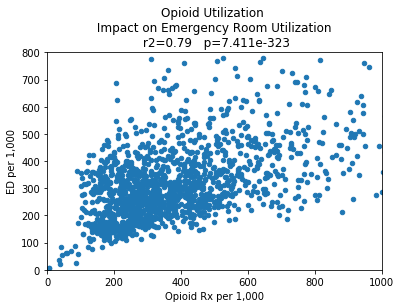

In [229]:
combo6_df.plot(x='Opioid Rx per 1,000', y='ED per 1,000', kind='scatter', xlim=(0,1000), ylim=(0,800),
               title=f'Opioid Utilization \n Impact on Emergency Room Utilization \n r2={oped_coeff}   p={oped_pval}')

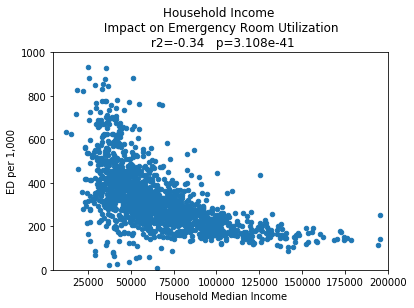

In [228]:
combo8_df.plot(x='Household Median Income', y='ED per 1,000', kind='scatter', xlim=(5000,200000), ylim=(0,1000),
               title=f'Household Income \n Impact on Emergency Room Utilization \n r2={inced_coeff}   p={inced_pval}')

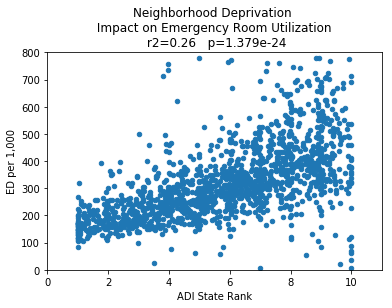

In [217]:
ax = combo8_df.plot(x='ADI State Rank', y='ED per 1,000', kind='scatter', xlim=(0,11), ylim=(0,800), 
                    title=f'Neighborhood Deprivation \n Impact on Emergency Room Utilization \n r2={adied_coeff}   p={adied_pval}')